<a href="https://colab.research.google.com/github/pastoril10/Python---AnaliseTenica_BBAS3/blob/main/Python_AnaliseTecnica_BBAS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

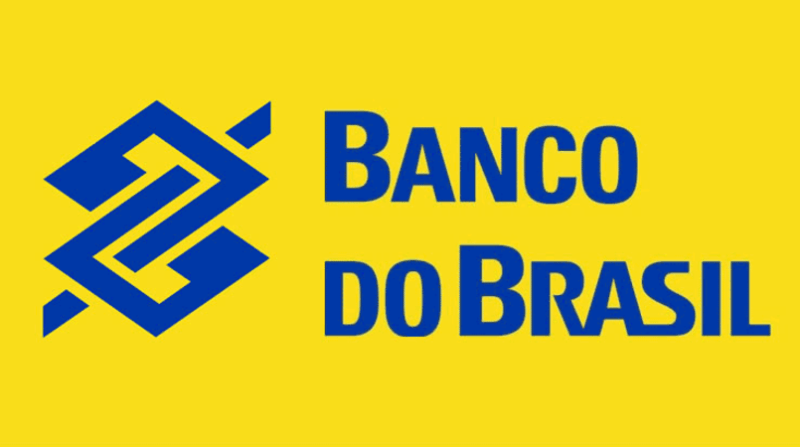


Neste trabalhamos, fizemos análises técnicas das ações do Banco do Brasil listado na B3. 

As informações históricas da ação do Banco do Brasil (BBAS3) foram importadas usando a biblioteca investpy 
https://readthedocs.org/projects/investpy/downloads/pdf/latest/


As análises foram feitas por meio da biblioteca ta - Technical Analysis.

https://technical-analysis-library-in-python.readthedocs.io/en/latest/)


Fizemos análise de indicadores de momento, volume, volatilidade e tendência. 






# Intalando bibliotecas

In [3]:
!pip install ta
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=a247a42d4534a7bbfa103b99d5092747e5ff18d3c9f0ef86e763db8b67a074a5
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 15.9 MB/s 
     |████████████████████████████████| 235 kB 57.3 MB/s 
     |████████████████████████████████| 6.4 MB 47.5 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=f202a3db2d1b4c0c45b3b7e89925cb7129ea5b0f98e8d54f46a0c4b0f779a610
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxm

# 1. Importando as bibliotecas

In [4]:
import ta
import investpy
import pandas as pd
import plotly.graph_objects as go


# 2. Captura de dados

In [5]:
df = investpy.get_stock_historical_data(stock = "BBAS3", 
                                        country = "Brazil",
                                        from_date = "01/01/2019",
                                        to_date = "01/01/2022")

In [6]:
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,42.19,45.38,42.09,44.38,14905300,BRL
2019-01-03,44.12,44.93,43.69,44.56,8879100,BRL
2019-01-04,43.90,45.50,43.76,44.56,8859200,BRL
2019-01-07,44.59,45.17,43.98,44.27,9393500,BRL
2019-01-08,44.38,44.79,42.76,43.77,14517300,BRL


# 3. Indicadores de momento

## 3.1. RSI - Relative Strenght index

In [7]:
from ta.momentum import RSIIndicator
from plotly.subplots import make_subplots

In [8]:
rsi = RSIIndicator(close = df["Close"],
                   window = 30)

df["RSI"] = rsi.rsi()

In [9]:
fig = make_subplots(rows = 2, cols = 1)


fig.add_trace(go.Scatter(name = "RSI", 
                         x = df.index, 
                         y = df["RSI"]), 
                         row = 2, 
                         col = 1)

#Tracejado na horizontal em y = 70
fig.add_hline(y=70, 
              line_width=3, 
              line_dash="dash",
              row=2, 
              col=1)

#Tracejado na horizontal em y = 30
fig.add_hline(y=30,
              line_width=3, 
              line_dash="dash",
              row=2, 
              col=1)
                        

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)


#retangulo vertical com o periodo de queda das ações durante o inicio do COVID19
fig.add_vrect(x0="2020-02-12", 
              x1="2020-04-15", 
              annotation_text="COVID", 
              annotation_position="top left",
              annotation=dict(font_size=20, 
                              font_family="Times New Roman"),
              fillcolor="green", 
              opacity=0.25, 
              line_width=0, 
              row=1, 
              col=1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / RSI do BBAS3 - Banco do Brasil")
fig.show()

## 3.2. Percentage Price Oscillator (PPO)

In [10]:
from ta.momentum import PercentagePriceOscillator

In [11]:
PPO = PercentagePriceOscillator(df["Close"])

df["PPO"] = PPO.ppo()
df["PPO_hist"]= PPO.ppo_hist()
df["PPO_line"]= PPO.ppo_signal()

In [12]:
fig = make_subplots(rows = 2, cols = 1, specs = [[{"secondary_y":True}], [{"secondary_y":True}]])


fig.add_trace(go.Scatter(name = "PPO", 
                         x = df.index, 
                         y = df["PPO"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Scatter(name = "PPO_line", 
                         x = df.index, 
                         y = df["PPO_line"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Bar(name = "PPO_hist", 
                         x = df.index, 
                         y = df["PPO_hist"]), 
                         row = 2, 
                         col = 1,
              secondary_y = True)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

#retangulo vertical com o periodo de queda das ações durante o inicio do COVID19
fig.add_vrect(x0="2020-02-12", 
              x1="2020-04-15", 
              annotation_text="COVID", 
              annotation_position="top left",
              annotation=dict(font_size=20, 
                              font_family="Times New Roman"),
              fillcolor="green", 
              opacity=0.25, 
              line_width=0, 
              row=1, 
              col=1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / PPO do BBAS3 - Banco do Brasil")
fig.show()

## 3.3 Rate of Change

ROC = (Fechamento - Fechamento de n periodos anteriores / fechamento de n periodo inferiores) * 100

In [13]:
from ta.momentum import ROCIndicator

In [14]:
roc = ROCIndicator(df["Close"])

df["ROC"] = roc.roc()

In [15]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Scatter(name = "ROC", 
                         x = df.index, 
                         y = df["ROC"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / ROC do BBAS3 - Banco do Brasil")
fig.show()

# 4. Indicadores de Volume

## 4.1. OBV - On Balance Volume

In [16]:
from ta.volume import OnBalanceVolumeIndicator

In [17]:
obv = OnBalanceVolumeIndicator(df["Close"], df["Volume"])

df["OBV"] = obv.on_balance_volume()


In [18]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Bar(name = "OBV", 
                         x = df.index, 
                         y = df["OBV"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / OBV do BBAS3 - Banco do Brasil")
fig.show()

## 4.2. VWAP - Volume Weighted Average Price

In [19]:
from ta.volume import VolumeWeightedAveragePrice

In [20]:
vwap = VolumeWeightedAveragePrice(df["High"], 
                                df["Low"], 
                                df["Close"], 
                                df["Volume"])
#Window default = 14
df["VWAP"] = vwap.volume_weighted_average_price()

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "VWAP", 
                         x = df.index, 
                         y = df["VWAP"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / VWAP do BBAS3 - Banco do Brasil")
fig.show()


## 4.3. Money Flow Index

In [22]:
from ta.volume import MFIIndicator

In [24]:

mfi = MFIIndicator(df["High"], 
                                df["Low"], 
                                df["Close"], 
                                df["Volume"])

df["MFI"] = mfi.money_flow_index()

In [25]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Bar(name = "MFI", 
                         x = df.index, 
                         y = df["MFI"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / MFI do BBAS3 - Banco do Brasil")
fig.show()

# 5. Indicadores de Volatilidade

## 5.1. Bandas de Bollinger

In [26]:
from ta.volatility import BollingerBands

In [27]:
bb = BollingerBands(close = df["Close"],
                    window = 10,
                    window_dev = 2)

df["BB_bbm"] = bb.bollinger_mavg()
df["BB_bbh"] = bb.bollinger_hband()
df["BB_bbl"] = bb.bollinger_lband()

In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "MédiaMovel", 
                         x = df.index, 
                         y = df["BB_bbm"]))

fig.add_trace(go.Scatter(name = "Banda Superior", 
                         x = df.index, 
                         y = df["BB_bbh"]))


fig.add_trace(go.Scatter(name = "Banda Inferiorr", 
                         x = df.index, 
                         y = df["BB_bbl"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Bandas de Bollinger do BBAS3 - Banco do Brasil")
fig.show()

## 5.2. ATR - Average True Range

In [29]:
from ta.volatility import AverageTrueRange

In [30]:
atr = AverageTrueRange(df["High"], 
                                df["Low"], 
                                df["Close"])


df["ATR"] = atr.average_true_range()

In [31]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Scatter(name = "ATR", 
                         x = df.index, 
                         y = df["ATR"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / ATR do BBAS3 - Banco do Brasil")
fig.show()

## 5.3. Keltner Channel

In [32]:
from ta.volatility import KeltnerChannel

In [33]:
keltner = KeltnerChannel(df["High"], 
                         df["Low"],
                         df["Close"])
df["KELTNER_MM"] = keltner.keltner_channel_mband()
df["KELTNER_HB"] = keltner.keltner_channel_hband()
df["KELTNER_LB"] = keltner.keltner_channel_lband()

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "MédiaMovel", 
                         x = df.index, 
                         y = df["KELTNER_MM"]))

fig.add_trace(go.Scatter(name = "Banda Superior", 
                         x = df.index, 
                         y = df["KELTNER_HB"]))


fig.add_trace(go.Scatter(name = "Banda Inferiorr", 
                         x = df.index, 
                         y = df["KELTNER_LB"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Keltner Channel do BBAS3 - Banco do Brasil")
fig.show()

# 6. Indicadores de tendência

## 6.1. MACD

In [35]:
from ta.trend import MACD

In [37]:
macd = MACD(df["Close"])

df["MACD_LINE"] = macd.macd()
df["MACD_DIFF"] = macd.macd_diff()

In [39]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Bar(name = "MACD", 
                         x = df.index, 
                         y = df["MACD_LINE"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Scatter(name = "MACD_DIFF", 
                         x = df.index, 
                         y = df["MACD_DIFF"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Scatter(name = "MACD_LINE", 
                         x = df.index, 
                         y = df["MACD_LINE"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / MACD do BBAS3 - Banco do Brasil")
fig.show()

## 6.2. Simple Moving Average

In [40]:
from ta.trend import SMAIndicator

In [45]:
sma_short = SMAIndicator(df["Close"], window = 5)
sma_long = SMAIndicator(df["Close"], window = 30)

df["SMA_SHORT"] = sma_short.sma_indicator()
df["SMA_LONG"] = sma_long.sma_indicator()

In [46]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "SMA_SHORT", 
                         x = df.index, 
                         y = df["SMA_SHORT"]))

fig.add_trace(go.Scatter(name = "SMA_LONG", 
                         x = df.index, 
                         y = df["SMA_LONG"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Média móvel Simples do BBAS3 - Banco do Brasil")
fig.show()

## 6.3. Exponential Moving Average

In [47]:
from ta.trend import EMAIndicator

In [48]:
ema_short = EMAIndicator(df["Close"], window = 5)
ema_long = EMAIndicator(df["Close"], window = 30)

df["EMA_SHORT"] = ema_short.ema_indicator()
df["EMA_LONG"] = ema_long.ema_indicator()

In [50]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "EMA_SHORT", 
                         x = df.index, 
                         y = df["EMA_SHORT"]))

fig.add_trace(go.Scatter(name = "EMA_LONG", 
                         x = df.index, 
                         y = df["EMA_LONG"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Média móvel Exponencial do BBAS3 - Banco do Brasil")
fig.show()